In [1]:
import os
from pathlib import Path
import sys

import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import torch

In [2]:
PATH_ROOT = Path(os.getcwd()).absolute().parent
print(PATH_ROOT)

/home/lukec/workspace/baard_v4


In [3]:
path_clean = os.path.join(PATH_ROOT, 'results', 'exp643896', 'MNIST', 'ApplicabilityStage', 'APGD-Linf', 'ApplicabilityStage-MNIST-APGD-Linf-clean.pt')

score_clean = torch.load(path_clean)
print(score_clean[:10])

[3.1593192 2.6863403 2.065223  2.1658397 3.2651396 3.157939  2.2869039
 1.98142   3.7203023 2.003308 ]


In [10]:
eps = 0.66
path_adv = os.path.join(PATH_ROOT, 'results', 'exp643896', 'MNIST', 'ApplicabilityStage', 'APGD-Linf', f'ApplicabilityStage-MNIST-APGD-Linf-{eps}.pt')

score_adv = torch.load(path_adv)
print(score_adv[:10])

[3.191142  2.8853488 2.8565688 3.2988544 3.268179  3.5647447 3.4838543
 3.2392952 2.91532   3.2466998]


<AxesSubplot: ylabel='Probability'>

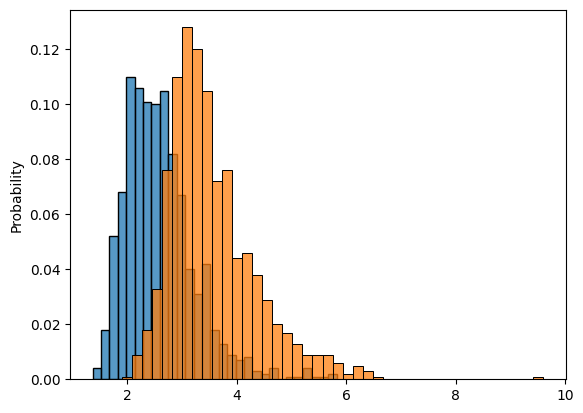

In [17]:
sn.histplot(score_clean, stat='probability')
sn.histplot(score_adv, stat='probability')